In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
mnist=loadmat(r"C:\Users\archa\OneDrive\Desktop\Downloads\mnist-original.mat")
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [10]:
digits=mnist['data']
print(digits)
print(digits.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(784, 70000)


In [11]:
digits=mnist['data'].T
print(digits)
print(digits.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000, 784)


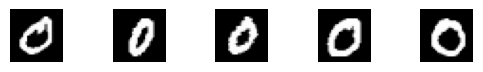

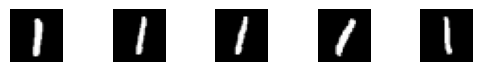

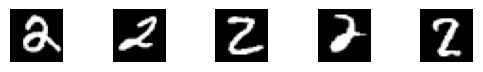

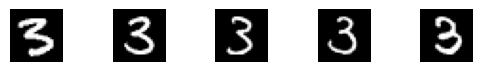

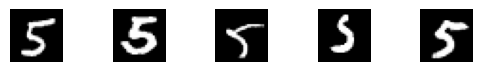

In [12]:
counter=1
for i in range(1,6):
    for j in range(1,6):
        plt.subplot(6,5,counter)
        plt.imshow(digits[(i-1)*8000+j].reshape((28,28)),cmap=cm.Greys_r)
        plt.axis('off')
        counter+=1
    plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [14]:
x=mnist['data'].T
y=mnist['label']
print(x.shape)
print(y.shape)

(70000, 784)
(1, 70000)


In [15]:
print(x[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

In [16]:
x=x/255*2-1
x[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [70000, 1]

In [ ]:
pipeline=Pipeline([
    ('clf',SVC(kernel='rbf'))
])

In [ ]:
parameter={
    'clf__gamma':(0.01,0.03,0.1,0.3,1),
    'clf__C':(0.1,0.3,1,3,10,30)
}

In [ ]:
grid_search=GridSearchCV(pipeline,parameter,n_jobs=-2,verbose=1,scoring='accuracy')
grid_search.fit(xtrain[:10000],ytrain[:10000])
print('best score',grid_search.best_score_)
print('best_parameter_set')
best_parameter=grid_search.best_estimator_.get_params()